# Area 1000 미만 삭제

In [1]:
import json
from pycocotools.coco import COCO

file_path = '../../../dataset/train.json'
new_file_path = '../dataset/train_area_10.json'

coco = COCO(file_path)

new_annotations = []
new_images = []

for img_id in coco.imgs:
    img_info = coco.loadImgs(ids=[img_id])[0]

    ann_ids = coco.getAnnIds(imgIds=[img_id])
    anns = coco.loadAnns(ids=ann_ids)

    for ann in anns:
        if ann['area'] >= 1000:
            new_annotations.append(ann)

    new_images.append(img_info)

coco.dataset['annotations'] = new_annotations
coco.dataset['images'] = new_images

with open(new_file_path, 'w') as f:
    json.dump(coco.dataset, f)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


# 잘린 annotation 삭제

In [155]:
import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageColor

In [157]:
file_path = '../../../dataset/train.json'
new_file_path = '../dataset/trim5000.json'

coco = COCO(file_path)

del_list = []
for ann in coco.loadAnns(coco.getAnnIds()):
    box = ann['bbox']
    if (box[0] <= 0 or box[1] <= 0 or (box[0] + box[2]) >= 1024 or (box[1] + box[3]) >= 1024) and ann['area'] < 5000:
        del_list.append(ann["id"])

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [158]:
idx = 0
print(len(del_list))

151


{'image_id': 161, 'category_id': 1, 'area': 1863.96, 'bbox': [289.5, 0.0, 95.1, 19.6], 'iscrowd': 0, 'id': 774}


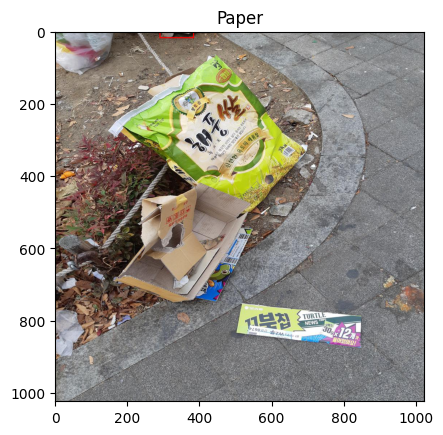

In [159]:
categories = ["General trash", "Paper", "Paper pack", "Metal", "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

ann = coco.loadAnns(del_list[idx])[0]
img_id = ann["image_id"]
img_file = coco.loadImgs(img_id)[0]['file_name']
img = Image.open(f"../../../dataset/{img_file}")

draw = ImageDraw.Draw(img)
box = ann['bbox']
category_id = ann['category_id']
draw.rectangle((box[0], box[1], box[0] + box[2], box[1] + box[3]), outline = ImageColor.getrgb('Red'), width=3)

print(ann)

plt.imshow(img)
plt.title(categories[category_id])
plt.show()
idx+=1

In [160]:
new_annotations = []
for ann in coco.loadAnns(coco.getAnnIds()):
    if ann['id'] not in del_list:
        new_annotations.append(ann)

coco.dataset['annotations'] = new_annotations

with open(new_file_path, 'w') as f:
    json.dump(coco.dataset, f)